# Medical Cost Personal Insurance Datasets

# * problem statement

# Insurance Forecast by using Linear Regression

# Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

# Columns                                            

# ·         age: age of primary beneficiary

# ·         sex: insurance contractor gender, female, male

# ·       bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

# ·       children: Number of children covered by health insurance / Number of dependents

# ·     smoker: Smoking

# ·      region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

# ·     charges: Individual medical costs billed by health insurance

# * Predict : Charges  Can you accurately predict insurance costs?

# * always refer sklearn official doucmentation if you are not sure about syntax or parameters

# https://scikit-learn.org/stable/index.html

In [1]:
# let's start with importing necessary liabries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read cavfile and convert into dataframe
data=pd.read_csv("medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

# understand data at high level .check the statistics of data set

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# no nan's value 

# lets see how data is distributed for every columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# there are no missing value

In [8]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# converting categorical feature to Numerical

In [11]:
data['sex']=data['sex'].replace({'male':0,'female':1})
data['smoker']=data['smoker'].replace({'no':0,'yes':1})
data['region']=data['region'].replace({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [13]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

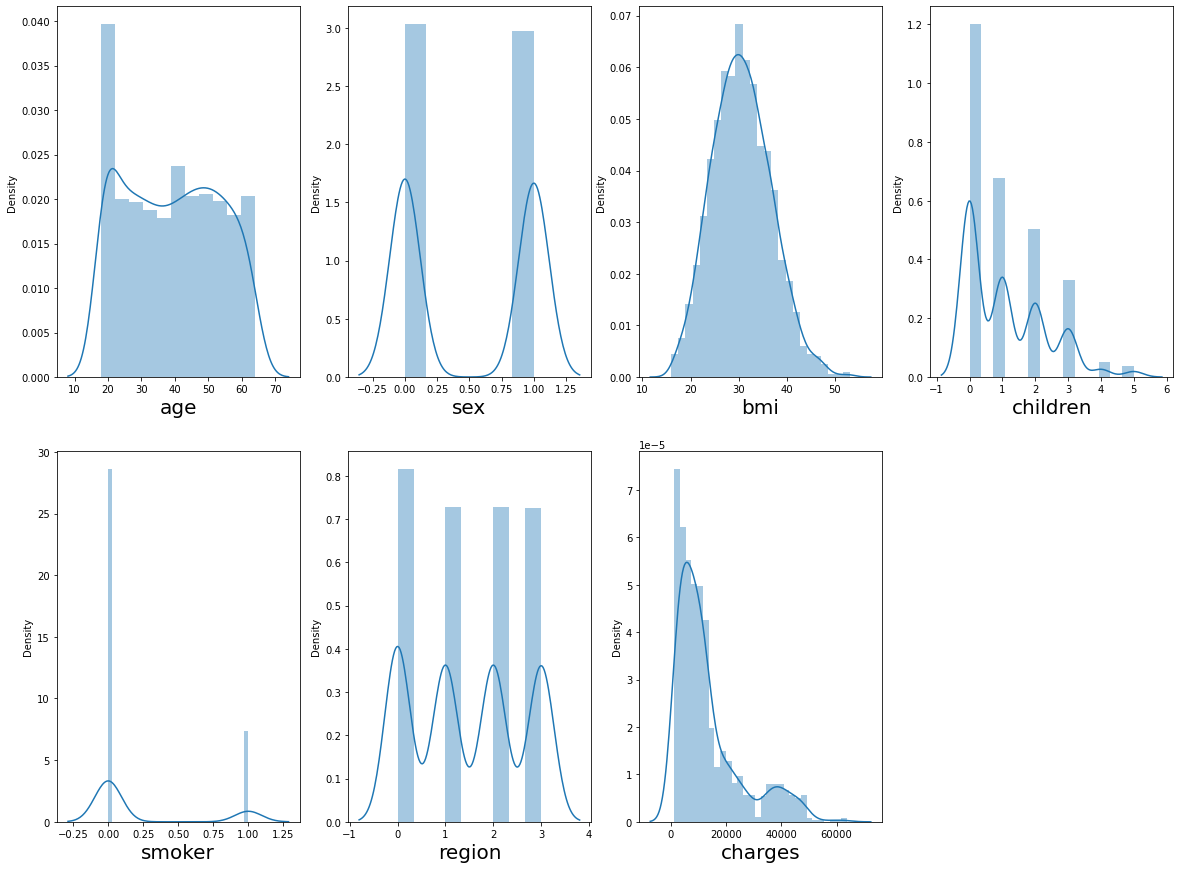

In [15]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in data:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Outliers checking

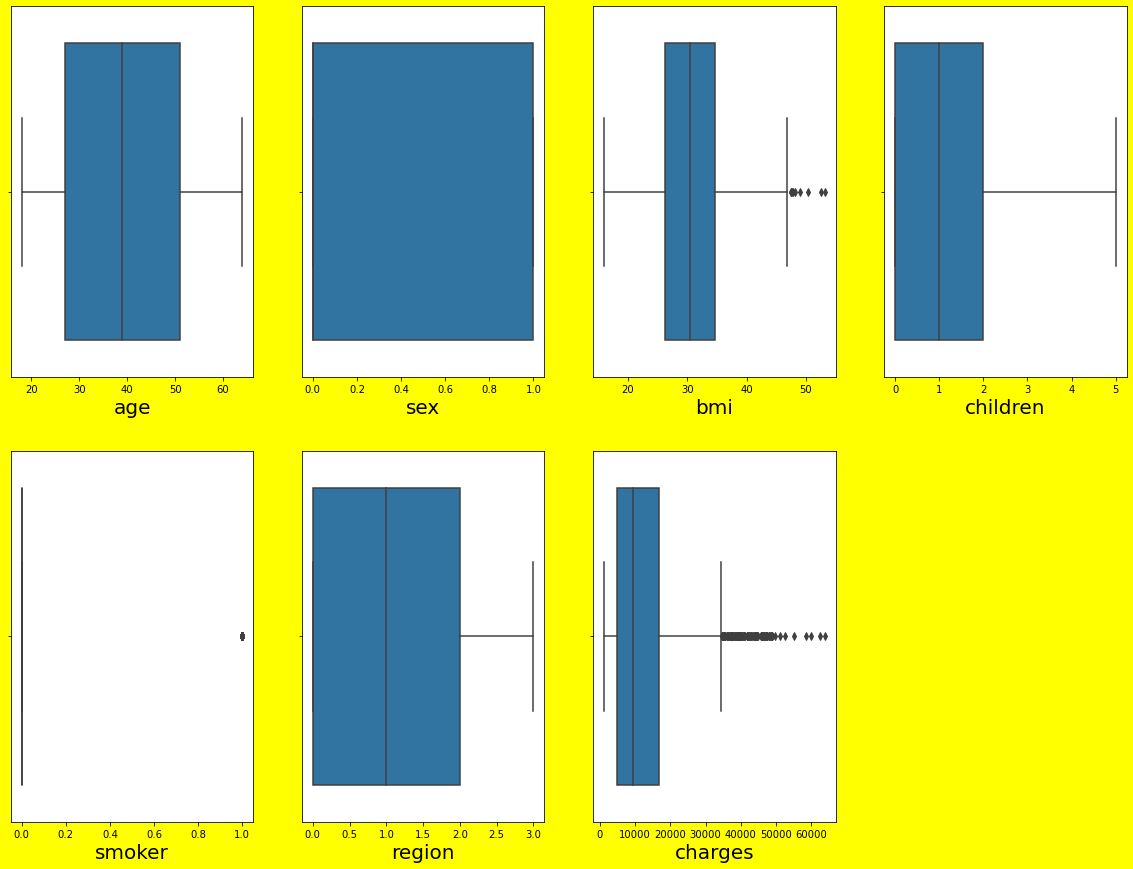

In [16]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Skewness:

In [17]:
data.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region      0.049225
charges     1.515880
dtype: float64

# * Removing Outliers:

# z-score techinque:

In [18]:
from scipy.stats import zscore
import numpy as np
z_score = zscore(data[['bmi','children','smoker','charges']])
abs_z_score = np.abs(z_score)


In [19]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,39.262032,0.497326,30.584037,1.045073,0.202445,1.466005,13089.622269
std,14.085397,0.500184,5.975320,1.124627,0.401975,1.129848,11738.168486
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.315000,0.000000,0.000000,0.000000,4686.388700
50%,39.000000,0.000000,30.305000,1.000000,0.000000,1.000000,9377.904700
75%,51.000000,1.000000,34.580000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,48.070000,4.000000,1.000000,3.000000,49577.662400


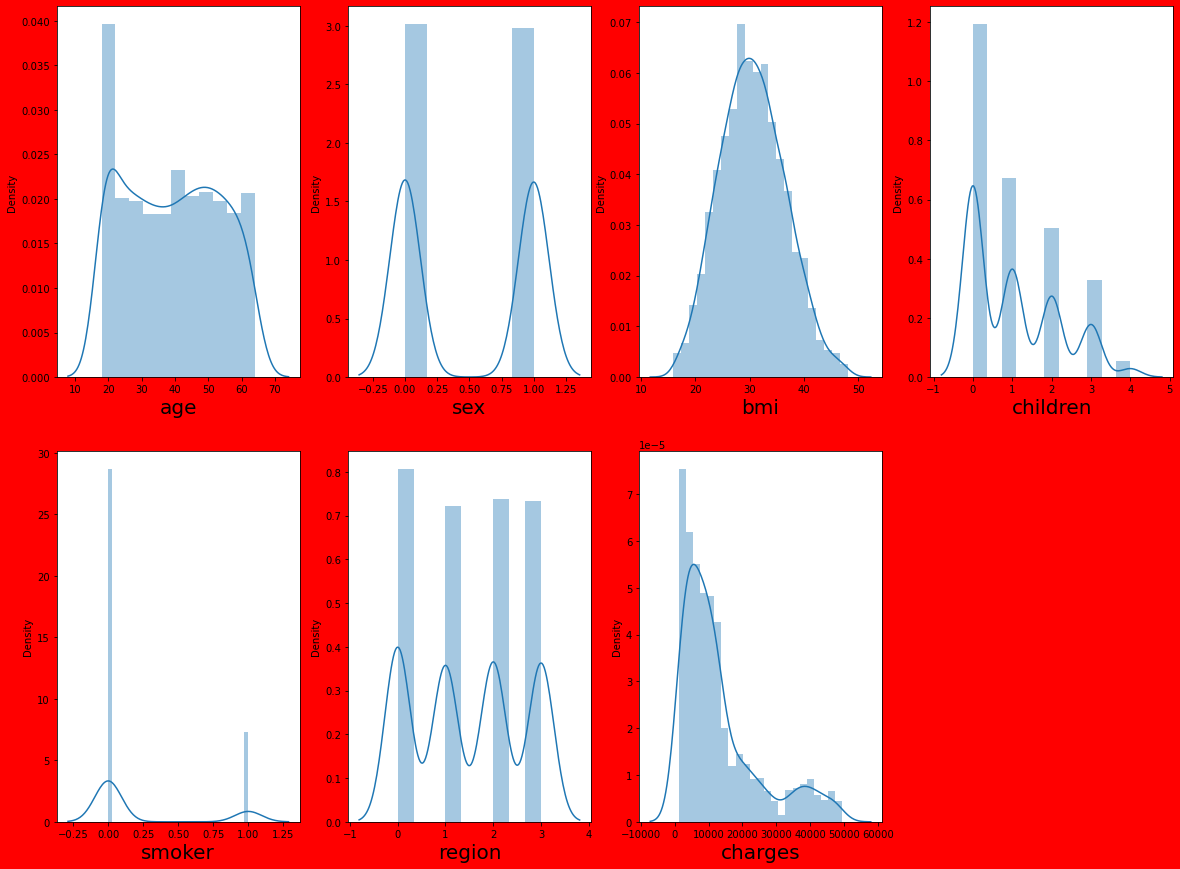

In [20]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# * Finding relationship we want to keep only those feature which relationship with Label

In [21]:
x=data.drop(columns=['charges'])
y=data['charges']

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# * check Multicollinearty problem. find if one feature is dependent on another feature

# VIF (variance inflation factor)

In [24]:
x_scaled.shape

(1309, 6)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

vif['feature']=x.columns

In [27]:
vif

,vif,feature
0,1.020264,age
1,1.008821,sex
2,1.091437,bmi
3,1.005602,children
4,1.009770,smoker
5,1.075449,region


# All the VIF values are less 5 and are very low that means no multicollinearity now we can go ahead with fitting our data to the model before that let's split in test and training set

# * Train Test Split

# split data into train and test modles will be bulit on training data and tested on test data

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=7999)

# * Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [31]:
regression.score(x_train,y_train)

0.7434112174193707

In [32]:
regression.score(x_test,y_test)

0.7770089231197007

# * Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
dt.score(x_train,y_train)

1.0

In [36]:
dt.score(x_test,y_test)

0.7852689030272914

# * Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
random = RandomForestRegressor()
random.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
random.score(x_train,y_train)

0.9746246652433206

In [40]:
random.score(x_test,y_test)

0.8629661501242603

# * Ridge Regression

In [41]:
from sklearn.linear_model import Ridge

In [42]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [43]:
ridge.score(x_train,y_train)

0.7434104029479962

In [44]:
ridge.score(x_test,y_test)

0.7769140623375494

#  Lets Save Our Model

In [45]:
import pickle
filename='MedicalCost.'
pickle.dump(regression,open(filename,'wb'))

# Conclusion

In [46]:
loaded_model=pickle.load(open('MedicalCost.','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

77.70089231197007


In [47]:
# batch  No - ds0522
# Data Trained